# Machine learning fairness

Machine Learning fairness is an important part of modern day data modeling. Here we explore an introduction to make models more fair and equitable.

Machine learning is a powerful tool that has revolutionized many industries by enabling computers to learn from data and make predictions or decisions.

However, as machine learning algorithms become increasingly ubiquitous in our daily lives, concerns about fairness and equity have emerged. Machine learning fairness refers to the idea that machine learning models should not perpetuate or exacerbate existing biases or discrimination. Fairness means that the model treats all individuals or groups fairly, regardless of race, gender, ethnicity, or other protected characteristics.

This notebook will provide an overview of the key concepts and challenges in machine learning fairness, as well as some techniques commonly used to address them.

## How To

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv("data/housing.csv").dropna()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [33]:
x_train, x_, y_train, y_ = train_test_split(df.drop(["longitude","latitude", "ocean_proximity", "median_house_value"], axis=1), 
                                                    df.median_house_value, test_size=.5, stratify=df.ocean_proximity)

x_val, x_test, y_val, y_test = train_test_split(x_, y_, test_size=.5)

In [34]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor().fit(x_train, y_train)

In [35]:
model.score(x_val, y_val)

0.6615001007467001

In [5]:
from sklearn.model_selection import cross_val_score

In [6]:
for cls in df.ocean_proximity.unique():
    print(cls)
    try:
        idx = df[df.ocean_proximity.isin([cls])].index

        idx_val = x_val.index.intersection(idx)
        print(model.score(x_val.loc[idx_val, :], y_val.loc[idx_val]))

        val = cross_val_score(model, x_val.loc[idx_val, :], y_val.loc[idx_val])
        print(val)
        print(val.mean(), " +- ", val.std(), "\n")
    except:
        print("Error in Validation")
    try:
        idx = df[df.ocean_proximity.isin([cls])].index

        idx_test = x_test.index.intersection(idx)
        print(model.score(x_test.loc[idx_test, :], y_test.loc[idx_test]))
        
        tst = cross_val_score(model,x_test.loc[idx_test, :], y_test.loc[idx_test])
        print(tst)
        print(tst.mean(), " +- ", tst.std(), "\n")
    except:
        print("Error in Test")

NEAR BAY
0.5754745000059804
[0.58638354 0.47319937 0.65842178 0.46363508 0.6242697 ]
0.5611818945092364  +-  0.0791543986860209 

0.6567441328266181
[0.53646545 0.46748218 0.55190976 0.52696585 0.66983248]
0.5505311458316486  +-  0.0661589092514031 

<1H OCEAN
0.617623698563106
[0.67519555 0.67215508 0.53369468 0.63864795 0.63476523]
0.6308916977470916  +-  0.051357419421612524 

0.5525398090611489
[0.63806671 0.59230829 0.61157096 0.55466628 0.5737604 ]
0.5940745287229554  +-  0.02901802895766562 

INLAND
0.2814595755804814
[0.34537133 0.5278734  0.44823455 0.47812396 0.42339269]
0.44459918671393395  +-  0.060609577378196194 

0.18724906812228304
[0.4334123  0.37076111 0.45254613 0.54698822 0.46631662]
0.45400487461710215  +-  0.056838698762534286 

NEAR OCEAN
0.6177571961377786
[0.5811095  0.60963444 0.64048118 0.61397684 0.6969247 ]
0.6284253319275264  +-  0.0390849119144478 

0.5554046699756433
[0.54088341 0.48843083 0.53815395 0.51689685 0.64735551]
0.5463441082268325  +-  0.05389

## Calculate Residuals

In [37]:
from yellowbrick.regressor import residuals_plot, prediction_error

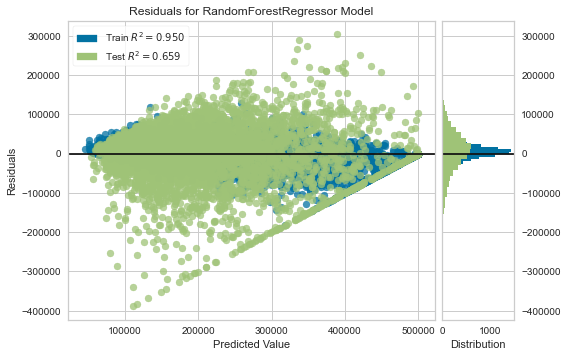

C:\tools\Anaconda3\envs\skillshare\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


ResidualsPlot(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002171C4659A0>,
              line_color=None, model=None, test_alpha=None, test_color=None,
              train_alpha=None, train_color=None)

In [36]:
residuals_plot(model, x_train, y_train, x_test, y_test)

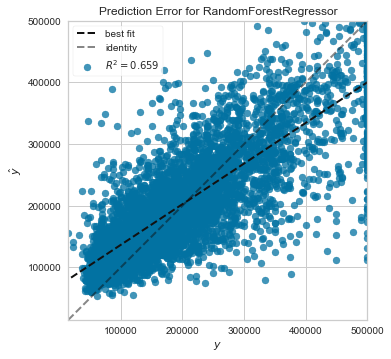

C:\tools\Anaconda3\envs\skillshare\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


PredictionError(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002171C5BCA90>,
                model=None)

In [38]:
prediction_error(model, x_train, y_train, x_test, y_test)

## Confusion Matrix for Classifiers

In [9]:
from sklearn.metrics import plot_confusion_matrix

In [16]:
from sklearn.ensemble import RandomForestClassifier

x_train, x_, y_train, y_ = train_test_split(df.drop(["longitude","latitude", "ocean_proximity"], axis=1), 
                                                    df.ocean_proximity, test_size=.5, stratify=df.ocean_proximity)

x_val, x_test, y_val, y_test = train_test_split(x_, y_, test_size=.5)

model = RandomForestClassifier().fit(x_train, y_train)

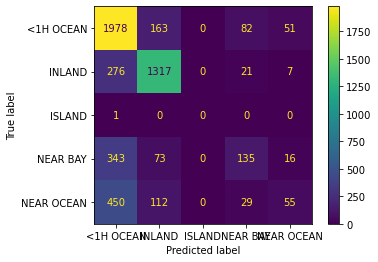

In [17]:
plot_confusion_matrix(model, x_test, y_test)

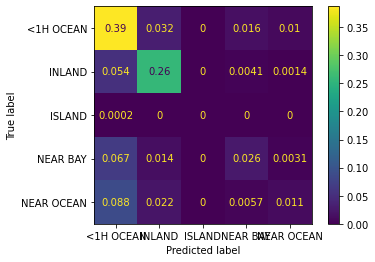

In [18]:
plot_confusion_matrix(model, x_test, y_test, normalize="all")

## Other Visualizations that are important

In [23]:
from yellowbrick.classifier import confusion_matrix, classification_report, precision_recall_curve, roc_auc

C:\tools\Anaconda3\envs\skillshare\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


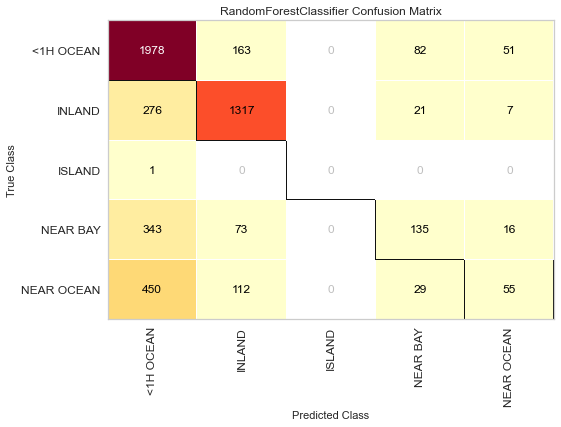

C:\tools\Anaconda3\envs\skillshare\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


ConfusionMatrix(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002171BEFFA60>,
                cmap=<matplotlib.colors.ListedColormap object at 0x000002171BF70670>,
                model=None)

In [24]:
confusion_matrix(model, x_train, y_train, x_test, y_test)

C:\tools\Anaconda3\envs\skillshare\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
C:\tools\Anaconda3\envs\skillshare\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


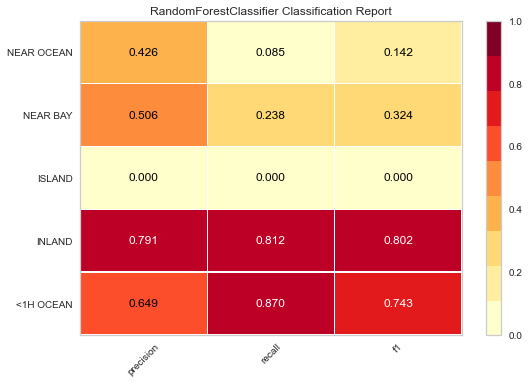

C:\tools\Anaconda3\envs\skillshare\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002171BF02E20>,
                     cmap=<matplotlib.colors.ListedColormap object at 0x000002171BFDDB20>,
                     model=None)

In [25]:
classification_report(model, x_train, y_train, x_test, y_test)

In [26]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

   <1H OCEAN       0.65      0.87      0.74      2274
      INLAND       0.79      0.81      0.80      1621
      ISLAND       0.00      0.00      0.00         1
    NEAR BAY       0.51      0.24      0.32       567
  NEAR OCEAN       0.43      0.09      0.14       646

    accuracy                           0.68      5109
   macro avg       0.47      0.40      0.40      5109
weighted avg       0.65      0.68      0.64      5109



C:\tools\Anaconda3\envs\skillshare\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\tools\Anaconda3\envs\skillshare\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


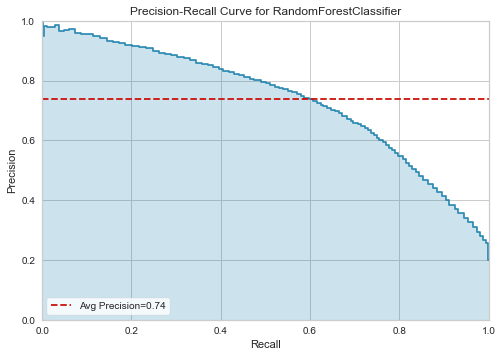

C:\tools\Anaconda3\envs\skillshare\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


PrecisionRecallCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002171C047BE0>,
                     iso_f1_values={0.2, 0.4, 0.6, 0.8}, model=None)

In [29]:
precision_recall_curve(model, x_train, y_train, x_test, y_test)

C:\tools\Anaconda3\envs\skillshare\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


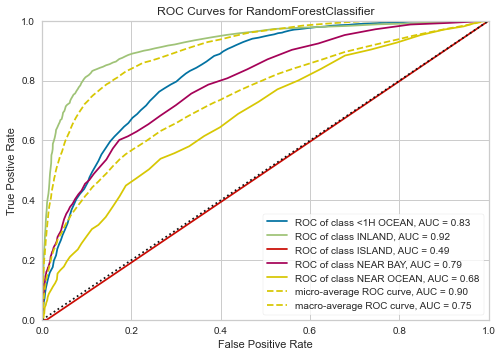

C:\tools\Anaconda3\envs\skillshare\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002171C2E5A00>,
       model=None)

In [30]:
roc_auc(model, x_train, y_train, x_test, y_test)

## Exercise
Modify the code to generate dummy models for each class.

## Additional Resources

- [ML Fairness](https://en.wikipedia.org/wiki/Fairness_(machine_learning))
- [ML Fairness Gym](https://ai.googleblog.com/2020/02/ml-fairness-gym-tool-for-exploring-long.html)
- [F A T M L](https://www.fatml.org/)